In [1]:
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
n_task_per_file = 50
n_files = 10
base_dir = "toy_eg_"
files_list = []
for i in range(n_files):
    dir = base_dir + str(i*n_task_per_file) + "_"  + str((i+1)*n_task_per_file) + ".pkl"
    files_list.append(dir)

In [3]:
coverage_df = pd.DataFrame()
length_df = pd.DataFrame()
MSE_df = pd.DataFrame()

for f_dir in files_list:
    coverage_i, length_i, MSE_i = joblib.load(f_dir)
    coverage_df = pd.concat([coverage_df, pd.DataFrame(coverage_i)])
    length_df = pd.concat([length_df, pd.DataFrame(length_i)])
    MSE_df = pd.concat([MSE_df, pd.DataFrame(MSE_i)])

In [4]:
coverage_df

,1.0,2.0,3.0,4.0,5.0,Tree val,Naive
0,0.833333,1.000000,0.666667,0.833333,0.800000,0.666667,0.666667
1,0.833333,0.833333,0.833333,0.857143,0.833333,1.000000,0.600000
2,1.000000,0.800000,0.857143,0.500000,0.800000,0.800000,0.400000
3,1.000000,1.000000,0.833333,1.000000,1.000000,0.666667,0.500000
4,0.857143,0.833333,0.833333,0.833333,0.833333,1.000000,0.857143
...,...,...,...,...,...,...,...
45,0.800000,1.000000,1.000000,1.000000,0.833333,1.000000,0.666667
46,1.000000,0.600000,0.833333,0.800000,0.666667,0.666667,0.333333
47,0.833333,0.800000,1.000000,0.833333,0.714286,1.000000,0.666667
48,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.666667


In [5]:
length_df

,1.0,2.0,3.0,4.0,5.0,Tree val,Naive
0,2.629903,2.047888,1.755783,1.747299,1.530281,30.884333,1.695381
1,2.708755,1.907685,1.849880,2.567560,1.769387,4.634760,1.503801
2,2.306647,1.885025,1.980014,2.111229,1.525491,13.070648,1.514036
3,2.474442,1.989395,3.673797,1.808851,5.201322,152.520638,1.651225
4,2.121947,1.861710,1.842078,1.826123,1.855989,4.685380,1.765289
...,...,...,...,...,...,...,...
45,46.841457,1.920345,1.654487,1.780278,1.788280,19.414653,1.672803
46,2.196216,1.726844,8.182168,2.136407,3.990373,46.683503,1.690658
47,2.487482,1.689773,1.774379,1.716813,1.797203,9.553098,1.706478
48,3.903737,1.951708,14.808239,1.888466,1.968359,5.536497,1.655894


In [6]:
MSE_df

,1.0,2.0,3.0,4.0,5.0,Tree val,Naive
0,5.566783,5.127728,5.270072,5.718790,6.176121,5.409857,5.409857
1,5.793763,5.370435,5.499710,5.999783,5.484971,5.435949,5.435949
2,5.023958,5.880662,5.845328,5.361912,7.054412,5.654430,5.654430
3,5.087601,5.739347,5.000509,5.651689,5.553772,5.289010,5.289010
4,3.548589,4.539948,4.707406,4.010781,4.836004,3.693696,3.693696
...,...,...,...,...,...,...,...
45,5.165960,5.183048,4.914190,6.552345,5.926967,5.567564,5.567564
46,5.212384,5.234555,5.403767,4.913383,5.547724,6.251231,6.251231
47,4.232615,4.639016,4.954645,5.389381,5.247173,4.024591,4.024591
48,5.450663,5.638987,6.184765,5.870438,7.609960,5.299860,5.299860


In [7]:
import seaborn as sns
def boxplots(dfs, metrics, len_lim=10, MSE_lim=10, 
             len_baseline_key=None, MSE_baseline_key=None):
    # Set up the subplots: one for each metric
    fig, axes = plt.subplots(1, 3, figsize=(15, 6))
    
    # Iterate over the dataframes and create a boxplot for each
    for i, (df, metric) in enumerate(zip(dfs, metrics)):
        sns.boxplot(data=df, ax=axes[i])
        axes[i].set_title(f'Boxplot for {metric}')
        axes[i].set_xlabel('Method')
        axes[i].set_ylabel('Value')
        # Add triangles for the mean values
        means = df.mean()  # Calculate mean for each method (column)
        print(metric,":\n",means.T)
        for j, mean in enumerate(means):
            axes[i].plot(j, mean, marker='^', color='red', markersize=10)  # Add a red triangle for the mean
        if metric == "Coverage":
            axes[i].set_ylim(0,1)
            axes[i].axhline(y=0.9, linestyle='dotted', color='grey')
        elif metric == "Length":
            axes[i].set_ylim(0,len_lim)
            if len_baseline_key:
                axes[i].axhline(y=means[len_baseline_key], linestyle='dotted', color='grey')
        elif metric == "MSE":
            axes[i].set_ylim(0,MSE_lim)
            if MSE_baseline_key:
                axes[i].axhline(y=means[MSE_baseline_key], linestyle='dotted', color='grey')
    
    # Show the plots
    plt.tight_layout()
    plt.show()

Coverage :
 1.0         0.896162
2.0         0.874619
3.0         0.871629
4.0         0.867905
5.0         0.869810
Tree val    0.917810
Naive       0.639648
dtype: float64
Length :
 1.0         3.502538
2.0         3.266354
3.0         2.641799
4.0         2.927559
5.0         2.544312
Tree val         inf
Naive       1.669600
dtype: float64
MSE :
 1.0         5.099299
2.0         5.168066
3.0         5.281130
4.0         5.350665
5.0         5.446767
Tree val    5.186290
Naive       5.186290
dtype: float64


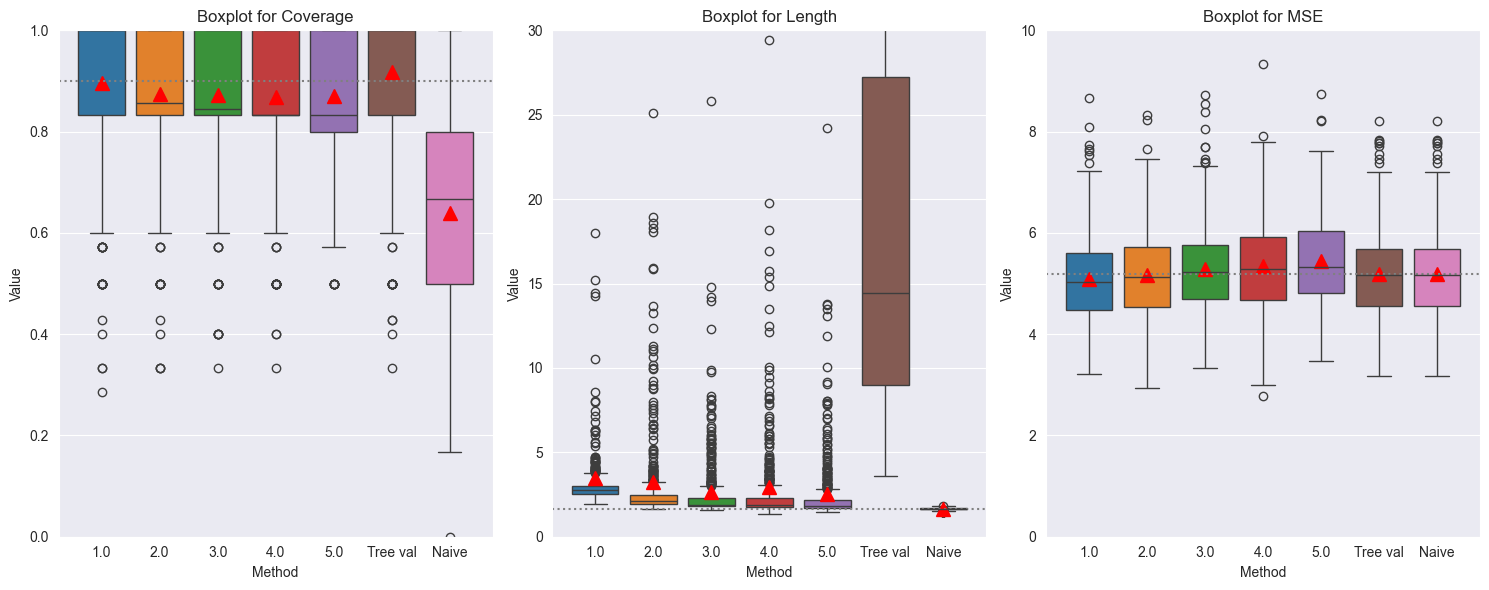

In [12]:
boxplots(dfs=[coverage_df, 
              length_df, 
              MSE_df], 
         len_lim=30,
         len_baseline_key="Naive",
         MSE_baseline_key="Naive",
         metrics=["Coverage", "Length", "MSE"])